In [1]:
library(tidyverse)
library(colorRamps)
library(wesanderson)
library(plotly)
library(stringr)
library(entropy)  
library(broom)
library(patchwork)
options(repr.plot.width=12, repr.plot.heigh=12)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




colormap

In [2]:
# colormap <- colorspace::diverge_hcl(12, c=100, l=c(50,90), power=1) 
my_palette <- wes_palette("Zissou1", 12, type = "continuous")

# Set default color and fill scales globally
update_geom_defaults("bar", list(fill = my_palette[1], color= "white"))
update_geom_defaults("col", list(fill = my_palette[2], color="white"))

# Optional: Set default discrete scale globally (use in your plots)
scale_fill_discrete <- function(...) scale_fill_manual(values = my_palette, ...)
scale_color_discrete <- function(...) scale_color_manual(values = my_palette, ...)


dual_pal <- wes_palette("Zissou1", 2, type = "continuous")

plot themes

In [3]:
ThemeMain<-theme( title =element_text(size=16, face='bold'),
                #  axis.text.y = element_blank(), 
                 axis.text.x = element_text(color='black'),
                #  axis.ticks.y = element_blank(),
                 axis.title.x = element_text(size=16,color='black',face='bold')
                 )


theme_set(theme_bw())
theme_set(ThemeMain)

## Data 

In [4]:
df <- read.csv('../../data/owid-energy-data.csv') %>% drop_na()


In [5]:
head(df)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,⋯,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bulgaria,2009,BGR,7634737,107365072896,200.106,0.041,8.078,0.062,1.310,⋯,0.000,0.005,94.656,0.320,0.662,31.435,0.24,86.696,0.567,0.327
2,Bulgaria,2010,BGR,7592271,109045211136,199.971,0.123,24.367,0.185,5.269,⋯,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
3,Bulgaria,2011,BGR,7543128,109435363328,5.558,0.010,25.889,0.195,7.954,⋯,0.200,0.124,26.377,0.484,2.375,114.011,0.86,314.918,1.721,1.058
4,Bulgaria,2012,BGR,7488347,110261510144,399.988,0.781,130.387,0.976,9.348,⋯,1.679,1.000,41.784,0.972,3.348,162.920,1.22,447.044,2.626,1.569
5,Bulgaria,2013,BGR,7431169,109643522048,29.912,0.292,170.692,1.268,14.803,⋯,3.231,1.915,12.500,0.396,3.743,184.359,1.37,503.742,3.185,1.890
6,Bulgaria,2014,BGR,7372142,110703534080,-0.613,-0.008,171.004,1.261,27.129,⋯,2.685,1.609,-3.126,-0.139,3.605,180.409,1.33,488.957,2.835,1.704


|variable                                     |class     |description                                  |
|:--------------------------------------------|:---------|:--------------------------------------------|
|country                                      |character |Geographic location                                     |
|year                                         |double    |Year of observation                                        |
|iso_code                                     |character |ISO 3166-1 alpha-3 three-letter country codes                                     |
|population                                   |double    |Population                                   |
|gdp                                          |double    |Total real gross domestic product, inflation-adjusted                                          |
|biofuel_cons_change_pct                      |double    |Annual percentage change in biofuel consumption                      |
|biofuel_cons_change_twh                      |double    |Annual change in biofuel consumption, measured in terawatt-hours                      |
|biofuel_cons_per_capita                      |double    |Per capita primary energy consumption from biofuels, measured in kilowatt-hours                      |
|biofuel_consumption                          |double    |Primary energy consumption from biofuels, measured in terawatt-hours                         |
|biofuel_elec_per_capita                      |double    |Per capita electricity generation from biofuels, measured in kilowatt-hours                      |
|biofuel_electricity                          |double    |Electricity generation from biofuels, measured in terawatt-hours                          |
|biofuel_share_elec                           |double    |Share of electricity generation that comes from biofuels                           |
|biofuel_share_energy                         |double    |Share of primary energy consumption that comes from biofuels                         |
|carbon_intensity_elec                        |double    |Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour                    |
|coal_cons_change_pct                         |double    |Annual percentage change in coal consumption                        |
|coal_cons_change_twh                         |double    |Annual change in coal consumption, measured in terawatt-hours                      |
|coal_cons_per_capita                         |double    |Per capita primary energy consumption from coal, measured in kilowatt-hours                      |
|coal_consumption                             |double    |Primary energy consumption from coal, measured in terawatt-hours                          |
|coal_elec_per_capita                         |double    |Per capita electricity generation from coal, measured in kilowatt-hours                      |
|coal_electricity                             |double    |Electricity generation from coal, measured in terawatt-hours                            |
|coal_prod_change_pct                         |double    |Annual percentage change in coal production                        |
|coal_prod_change_twh                         |double    |Annual change in coal production, measured in terawatt-hours                     |
|coal_prod_per_capita                         |double    |Per capita coal production, measured in kilowatt-hours                       |
|coal_production                              |double    |Coal production, measured in terawatt-hours                            |
|coal_share_elec                              |double    |Share of electricity generation that comes from coal                       |
|coal_share_energy                            |double    |hare of primary energy consumption that comes from coal                        |
|electricity_demand                           |double    |Electricity demand, measured in terawatt-hours                      |
|electricity_generation                       |double    |Electricity generation, measured in terawatt-hours                     |
|electricity_share_energy                     |double    |Electricity generation as a share of primary energy                  |
|energy_cons_change_pct                       |double    |Annual percentage change in primary energy consumption                |
|energy_cons_change_twh                       |double    |Annual change in primary energy consumption, measured in terawatt-hours                 |
|energy_per_capita                            |double    |Primary energy consumption per capita, measured in kilowatt-hours                      |
|energy_per_gdp                               |double    |Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$                            |
|fossil_cons_change_pct                       |double    |Annual percentage change in fossil fuel consumption                     |
|fossil_cons_change_twh                       |double    |Annual change in fossil fuel consumption, measured in terawatt-hours                     |
|fossil_elec_per_capita                       |double    |Per capita electricity generation from fossil fuels, measured in kilowatt-hours. This is the sum of electricity generated from coal, oil and gas.                       |
|fossil_electricity                           |double    |Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.                        |
|fossil_energy_per_capita                     |double    |Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.              |
|fossil_fuel_consumption                      |double    |Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.              |
|fossil_share_elec                            |double    |Share of electricity generation that comes from fossil fuels (coal, oil and gas combined)                       |
|fossil_share_energy                          |double    |Share of primary energy consumption that comes from fossil fuels                   |
|gas_cons_change_pct                          |double    |Annual percentage change in gas consumption                     |
|gas_cons_change_twh                          |double    |Annual change in gas consumption, measured in terawatt-hours                        |
|gas_consumption                              |double    |Primary energy consumption from gas, measured in terawatt-hours                       |
|gas_elec_per_capita                          |double    |Per capita electricity generation from gas, measured in kilowatt-hours                   |
|gas_electricity                              |double    |Electricity generation from gas, measured in terawatt-hours                     |
|gas_energy_per_capita                        |double    |Per capita primary energy consumption from gas, measured in kilowatt-hours                  |
|gas_prod_change_pct                          |double    |Annual percentage change in gas production                      |
|gas_prod_change_twh                          |double    |Annual change in gas production, measured in terawatt-hours                    |
|gas_prod_per_capita                          |double    |Per capita gas production, measured in kilowatt-hours                    |
|gas_production                               |double    |Gas production, measured in terawatt-hours                       |
|gas_share_elec                               |double    |Share of electricity generation that comes from gas                       |
|gas_share_energy                             |double    |Share of primary energy consumption that comes from gas              |
|greenhouse_gas_emissions                     |double    |Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent              |
|hydro_cons_change_pct                        |double    |Annual percentage change in hydropower consumption                  |
|hydro_cons_change_twh                        |double    |Annual change in hydropower consumption, measured in terawatt-hours                 |
|hydro_consumption                            |double    |Primary energy consumption from hydropower, measured in terawatt-hours                     |
|hydro_elec_per_capita                        |double    |Per capita electricity generation from hydropower, measured in kilowatt-hours              |
|hydro_electricity                            |double    |Electricity generation from hydropower, measured in terawatt-hours                   |
|hydro_energy_per_capita                      |double    |Per capita primary energy consumption from hydropower, measured in kilowatt-hours              |
|hydro_share_elec                             |double    |Share of electricity generation that comes from hydropower                         |
|hydro_share_energy                           |double    |Share of primary energy consumption that comes from hydropower                 |
|low_carbon_cons_change_pct                   |double    |Annual percentage change in low-carbon energy consumption               |
|low_carbon_cons_change_twh                   |double    |Annual change in low-carbon energy consumption, measured in terawatt-hours             |
|low_carbon_consumption                       |double    |Primary energy consumption from low-carbon sources, measured in terawatt-hours            |
|low_carbon_elec_per_capita                   |double    |Per capita electricity generation from low-carbon sources, measured in kilowatt-hours       |
|low_carbon_electricity                       |double    |Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power                 |
|low_carbon_energy_per_capita                 |double    |Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours             |
|low_carbon_share_elec                        |double    |Share of electricity generation that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear                 |
|low_carbon_share_energy                      |double    |Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear                   |
|net_elec_imports                             |double    |Net electricity imports, measured in terawatt-hours                         |
|net_elec_imports_share_demand                |double    |Net electricity imports as a share of electricity demand           |
|nuclear_cons_change_pct                      |double    |Annual percentage change in nuclear consumption                |
|nuclear_cons_change_twh                      |double    |Annual change in nuclear consumption, measured in terawatt-hours                |
|nuclear_consumption                          |double    |Primary energy consumption from nuclear power, measured in terawatt-hours                 |
|nuclear_elec_per_capita                      |double    |Per capita electricity generation from nuclear power, measured in kilowatt-hours            |
|nuclear_electricity                          |double    |Electricity generation from nuclear power, measured in terawatt-hours                  |
|nuclear_energy_per_capita                    |double    |Per capita primary energy consumption from nuclear, measured in kilowatt-hours          |
|nuclear_share_elec                           |double    |Share of electricity generation that comes from nuclear power             |
|nuclear_share_energy                         |double    |Share of primary energy consumption that comes from nuclear power              |
|oil_cons_change_pct                          |double    |Annual percentage change in oil consumption                      |
|oil_cons_change_twh                          |double    |Annual change in oil consumption, measured in terawatt-hours                  |
|oil_consumption                              |double    |Primary energy consumption from oil, measured in terawatt-hours                         |
|oil_elec_per_capita                          |double    |Per capita electricity generation from oil, measured in kilowatt-hours               |
|oil_electricity                              |double    |Electricity generation from oil, measured in terawatt-hours           |
|oil_energy_per_capita                        |double    |Per capita primary energy consumption from oil, measured in kilowatt-hours                  |
|oil_prod_change_pct                          |double    |Annual percentage change in oil production                     |
|oil_prod_change_twh                          |double    |Annual change in oil production, measured in terawatt-hours                |
|oil_prod_per_capita                          |double    |Per capita oil production, measured in kilowatt-hours                     |
|oil_production                               |double    |Oil production, measured in terawatt-hours                   |
|oil_share_elec                               |double    |Share of electricity generation that comes from oil                         |
|oil_share_energy                             |double    |Share of primary energy consumption that comes from oil                    |
|other_renewable_consumption                  |double    |Primary energy consumption from other renewables, measured in terawatt-hours            |
|other_renewable_electricity                  |double    |Electricity generation from other renewable sources including biofuels, measured in terawatt-hours           |
|other_renewable_exc_biofuel_electricity      |double    |Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours   |
|other_renewables_cons_change_pct             |double    |Annual percentage change in energy consumption from other renewables       |
|other_renewables_cons_change_twh             |double    |Annual change in other renewable consumption, measured in terawatt-hours       |
|other_renewables_elec_per_capita             |double    |Per capita electricity generation from other renewables including biofuels, measured in kilowatt-hours     |
|other_renewables_elec_per_capita_exc_biofuel |double    |Per capita electricity generation from other renewables excluding biofuels, measured in kilowatt-hours |
|other_renewables_energy_per_capita           |double    |Per capita primary energy consumption from other renewables, measured in kilowatt-hours      |
|other_renewables_share_elec                  |double    |Share of electricity generation that comes from other renewables including biofuels       |
|other_renewables_share_elec_exc_biofuel      |double    |Share of electricity generation that comes from other renewables excluding biofuels    |
|other_renewables_share_energy                |double    |Share of primary energy consumption that comes from other renewables                |
|per_capita_electricity                       |double    |Electricity generation per capita, measured in kilowatt-hours                  |
|primary_energy_consumption                   |double    |Primary energy consumption, measured in terawatt-hours         |
|renewables_cons_change_pct                   |double    |Annual percentage change in renewable energy consumption             |
|renewables_cons_change_twh                   |double    |Annual change in renewable energy consumption, measured in terawatt-hours            |
|renewables_consumption                       |double    |Primary energy consumption from renewables, measured in terawatt-hours               |
|renewables_elec_per_capita                   |double    |Per capita electricity generation from renewables, measured in kilowatt-hours         |
|renewables_electricity                       |double    |Electricity generation from renewables, measured in terawatt-hours           |
|renewables_energy_per_capita                 |double    |Per capita primary energy consumption from renewables, measured in kilowatt-hours        |
|renewables_share_elec                        |double    |Share of electricity generation that comes from renewables                  |
|renewables_share_energy                      |double    |Share of primary energy consumption that comes from renewables                    |
|solar_cons_change_pct                        |double    |Annual percentage change in solar consumption                   |
|solar_cons_change_twh                        |double    |Annual change in solar consumption, measured in terawatt-hours             |
|solar_consumption                            |double    |Primary energy consumption from solar, measured in terawatt-hours               |
|solar_elec_per_capita                        |double    |Per capita electricity generation from solar, measured in kilowatt-hours                |
|solar_electricity                            |double    |Electricity generation from solar, measured in terawatt-hours                   |
|solar_energy_per_capita                      |double    |Per capita primary energy consumption from solar, measured in kilowatt-hours                 |
|solar_share_elec                             |double    |Share of electricity generation that comes from solar                      |
|solar_share_energy                           |double    |Share of primary energy consumption that comes from solar                 |
|wind_cons_change_pct                         |double    |Annual percentage change in wind consumption                  |
|wind_cons_change_twh                         |double    |Annual change in wind consumption                 |
|wind_consumption                             |double    |Primary energy consumption from wind, measured in terawatt-hours                 |
|wind_elec_per_capita                         |double    |Per capita electricity generation from wind, measured in kilowatt-hours              |
|wind_electricity                             |double    |Electricity generation from wind, measured in terawatt-hours                     |
|wind_energy_per_capita                       |double    |Per capita primary energy consumption from wind, measured in kilowatt-hours                      |
|wind_share_elec                              |double    |Share of electricity generation that comes from wind                        |
|wind_share_energy                            |double    |Share of primary energy consumption that comes from wind                    |

The data consisits of different information for the following natural resources

- biofuel,
- coal
- fossil fuels,
- gas
- hydro
- low carbon,
- nuclear
- oil
- renewables
- other renewables
- solar
- wind

Each of these resources has the following information

- con_change_pct
- con_chang_twh 
- consumption 
- electricity per capita
- energy per capita 
- share elec
- share energy


Additionaly, The dataset contains information about the country 


- year 
- GDP 
- population
- electricity demand 
- electricity gneeration

### Pre Processing

In [6]:
RESOURCES = c("biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil",  "solar", "wind", "low_carbon", "renewables", "other_renewables")

In [7]:
COUNTRY_INFO = c("country", "year", "gdp", "iso_code", "population", "greenhouse_gas_emissions", "carbon_intensity_elec", "net_elec_imports", "net_elec_imports_share_demand", "per_capita_electricity", "electricity_demand", "electricity_generation", "electricity_share_energy", "energy_cons_change_pct", "energy_cons_change_twh", "energy_per_capita", "energy_per_gdp", "primary_energy_consumption")

In [8]:
df_long <- df %>%
  pivot_longer(
    cols =  -all_of(COUNTRY_INFO),
    names_to = "resource_stat",
    values_to = "value"
  ) %>% 
  mutate(
    resource_stat = gsub("fossil_fuel", "fossil",
                    gsub("renewable_", "renewables_", resource_stat))
  )%>%
  mutate(
    resource = str_extract(resource_stat, str_c(RESOURCES, collapse = "|")),
    stat = str_remove(resource_stat, str_c(resource, "_"))
  )%>%
  rename(
    country_energy_per_capita = energy_per_capita
  ) %>%
  select(-resource_stat) %>%
  pivot_wider(
    names_from = stat,
    values_from = value
  )

In [9]:
str(df_long)

tibble [1,656 × 35] (S3: tbl_df/tbl/data.frame)
 $ country                      : chr [1:1656] "Bulgaria" "Bulgaria" "Bulgaria" "Bulgaria" ...
 $ year                         : int [1:1656] 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...
 $ iso_code                     : chr [1:1656] "BGR" "BGR" "BGR" "BGR" ...
 $ population                   : num [1:1656] 7634737 7634737 7634737 7634737 7634737 ...
 $ gdp                          : num [1:1656] 1.07e+11 1.07e+11 1.07e+11 1.07e+11 1.07e+11 ...
 $ carbon_intensity_elec        : num [1:1656] 528 528 528 528 528 ...
 $ electricity_demand           : num [1:1656] 37.2 37.2 37.2 37.2 37.2 ...
 $ electricity_generation       : num [1:1656] 42.3 42.3 42.3 42.3 42.3 ...
 $ electricity_share_energy     : num [1:1656] 24.9 24.9 24.9 24.9 24.9 ...
 $ energy_cons_change_pct       : num [1:1656] -12.2 -12.2 -12.2 -12.2 -12.2 ...
 $ energy_cons_change_twh       : num [1:1656] -28.1 -28.1 -28.1 -28.1 -28.1 ...
 $ country_energy_per_capita    :

In [10]:
options(repr.matrix.max.cols=50)

In [11]:
head(df_long)

country,year,iso_code,population,gdp,carbon_intensity_elec,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,country_energy_per_capita,energy_per_gdp,greenhouse_gas_emissions,net_elec_imports,net_elec_imports_share_demand,per_capita_electricity,primary_energy_consumption,resource,cons_change_pct,cons_change_twh,cons_per_capita,consumption,elec_per_capita,electricity,share_elec,share_energy,prod_change_pct,prod_change_twh,prod_per_capita,production,energy_per_capita,exc_biofuel_electricity,elec_per_capita_exc_biofuel,share_elec_exc_biofuel
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bulgaria,2009,BGR,7634737,107365072896,528.48,37.24,42.31,24.905,-12.213,-28.117,26471.97,1.882,22.36,-5.07,-13.614,5541.776,202.106,biofuel,200.106,0.041,8.078,0.062,1.310,0.01,0.024,0.031,NA,NA,NA,NA,NA,NA,NA,NA
Bulgaria,2009,BGR,7634737,107365072896,528.48,37.24,42.31,24.905,-12.213,-28.117,26471.97,1.882,22.36,-5.07,-13.614,5541.776,202.106,coal,-15.823,-13.871,9665.478,73.793,2763.684,21.10,49.870,36.512,-5.231,-2.958,7017.741,53.579,NA,NA,NA,NA
Bulgaria,2009,BGR,7634737,107365072896,528.48,37.24,42.31,24.905,-12.213,-28.117,26471.97,1.882,22.36,-5.07,-13.614,5541.776,202.106,fossil,-15.921,-28.570,NA,150.882,3061.009,23.37,55.235,74.655,NA,NA,NA,NA,19762.596,NA,NA,NA
Bulgaria,2009,BGR,7634737,107365072896,528.48,37.24,42.31,24.905,-12.213,-28.117,26471.97,1.882,22.36,-5.07,-13.614,5541.776,202.106,gas,-28.470,-9.658,NA,24.264,256.721,1.96,4.632,12.005,-90.909,-1.038,13.595,0.104,3178.073,NA,NA,NA
Bulgaria,2009,BGR,7634737,107365072896,528.48,37.24,42.31,24.905,-12.213,-28.117,26471.97,1.882,22.36,-5.07,-13.614,5541.776,202.106,hydro,22.881,1.736,NA,9.584,449.262,3.43,8.107,4.742,NA,NA,NA,NA,1255.287,NA,NA,NA
Bulgaria,2009,BGR,7634737,107365072896,528.48,37.24,42.31,24.905,-12.213,-28.117,26471.97,1.882,22.36,-5.07,-13.614,5541.776,202.106,low_carbon,1.503,0.453,NA,51.224,2480.767,18.94,44.765,25.345,NA,NA,NA,NA,6709.371,NA,NA,NA


Unique years for data collected

In [12]:
unique(df$year)

[1] 2009 2010 2011 2012 2013 2014 2015 2016 2005 2006 2007 2008 1993 1994 1995
[16] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2017 2018 2019 2020 2021 2022

Unique countries

In [13]:
unique(df$country)

[1] "Bulgaria"       "Czechia"        "France"         "Germany"       
 [5] "Hungary"        "Romania"        "Slovakia"       "Slovenia"      
 [9] "Spain"          "Ukraine"        "United Kingdom" "United States"

## Univariate

In [14]:
subset <- subset(df, year==2010)

In [15]:
subset

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,⋯,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Bulgaria,2010,BGR,7592271,1.090452e+11,199.971,0.123,24.367,0.185,5.269,0.04,0.087,0.087,521.010,8.474,6.254,10543.219,80.047,2978.029,22.61,7.349,3.938,7575.616,57.516,49.227,⋯,211.471,58.987,5.855,16.195,758.666,5.76,2133.067,12.541,7.658,355.005,0.032,0.041,1.317,0.01,5.434,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
14,Czechia,2010,CZE,10464750,2.712320e+11,19.590,0.445,259.469,2.715,206.407,2.16,2.535,0.529,593.640,3.216,6.805,20868.264,218.381,4481.713,46.90,-0.075,-0.181,23158.000,242.343,55.034,⋯,513.649,24.446,3.992,20.001,564.753,5.91,1911.264,6.935,3.894,593.303,1.461,1.709,59.247,0.62,163.303,0.728,0.333,16.464,0.127,0.931,32.490,0.34,88.983,0.399,0.181
50,Germany,2010,DEU,81325088,3.301123e+12,0.094,0.030,387.854,31.542,417.091,33.92,5.434,0.820,516.637,7.417,61.880,11019.628,896.172,3232.582,262.89,-1.113,-6.008,6563.718,533.795,42.116,⋯,3847.151,7.348,26.115,338.261,1296.156,105.41,4159.365,16.887,8.792,78.153,14.451,33.204,147.064,11.96,408.290,1.916,0.863,-2.215,-3.098,106.990,474.023,38.55,1315.587,6.176,2.781
58,Hungary,2010,HUN,9986832,2.004966e+11,3.470,0.068,202.188,2.019,230.303,2.30,6.156,0.727,341.006,5.355,1.591,3135.001,31.309,623.821,6.23,2.392,0.433,1855.420,18.530,16.676,⋯,277.827,3.832,0.370,11.339,302.398,3.02,1135.398,8.084,4.081,0.000,0.000,0.003,0.000,0.00,0.278,0.000,0.001,59.215,0.538,1.463,53.070,0.53,146.466,1.419,0.526
65,Romania,2010,ROU,20335212,3.354896e+11,180.791,0.853,65.136,1.325,5.409,0.11,0.182,0.334,424.528,-6.525,-5.717,4027.240,81.895,1016.955,20.68,-10.080,-7.697,3376.298,68.658,34.227,⋯,396.424,34.949,13.807,57.721,998.268,20.30,2838.458,33.598,14.560,100.000,0.003,0.006,0.000,0.00,0.276,0.000,0.001,3300.000,0.824,0.849,15.244,0.31,41.766,0.513,0.214
89,Spain,2010,ESP,46572776,1.480376e+12,37.230,6.038,477.900,22.257,86.102,4.01,1.347,1.315,288.247,-26.861,-29.459,1722.296,80.212,543.880,25.33,-13.502,-5.983,823.002,38.329,8.506,⋯,1692.348,32.159,68.520,291.966,2099.295,97.77,6269.031,32.831,17.252,16.441,2.665,19.608,154.382,7.19,421.016,2.414,1.159,15.294,15.434,121.241,950.555,44.27,2603.260,14.866,7.164
106,United Kingdom,2010,GBR,62760048,2.190920e+12,16.267,1.863,212.173,13.316,195.347,12.26,3.209,0.537,517.196,2.340,8.114,5653.417,354.809,1714.307,107.59,3.501,4.270,2011.329,126.231,28.160,⋯,2481.120,7.629,4.858,91.090,417.144,26.18,1451.408,6.852,3.671,101.383,0.056,0.112,0.637,0.04,1.781,0.010,0.005,10.825,2.630,28.549,163.958,10.29,454.885,2.693,1.151
126,United States,2010,USA,311182848,1.523959e+13,14.967,38.636,953.695,296.773,180.248,56.09,1.363,1.143,536.658,5.803,318.165,18640.299,5800.542,5936.349,1847.29,1.917,115.406,19717.758,6135.828,44.903,⋯,25953.547,7.092

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


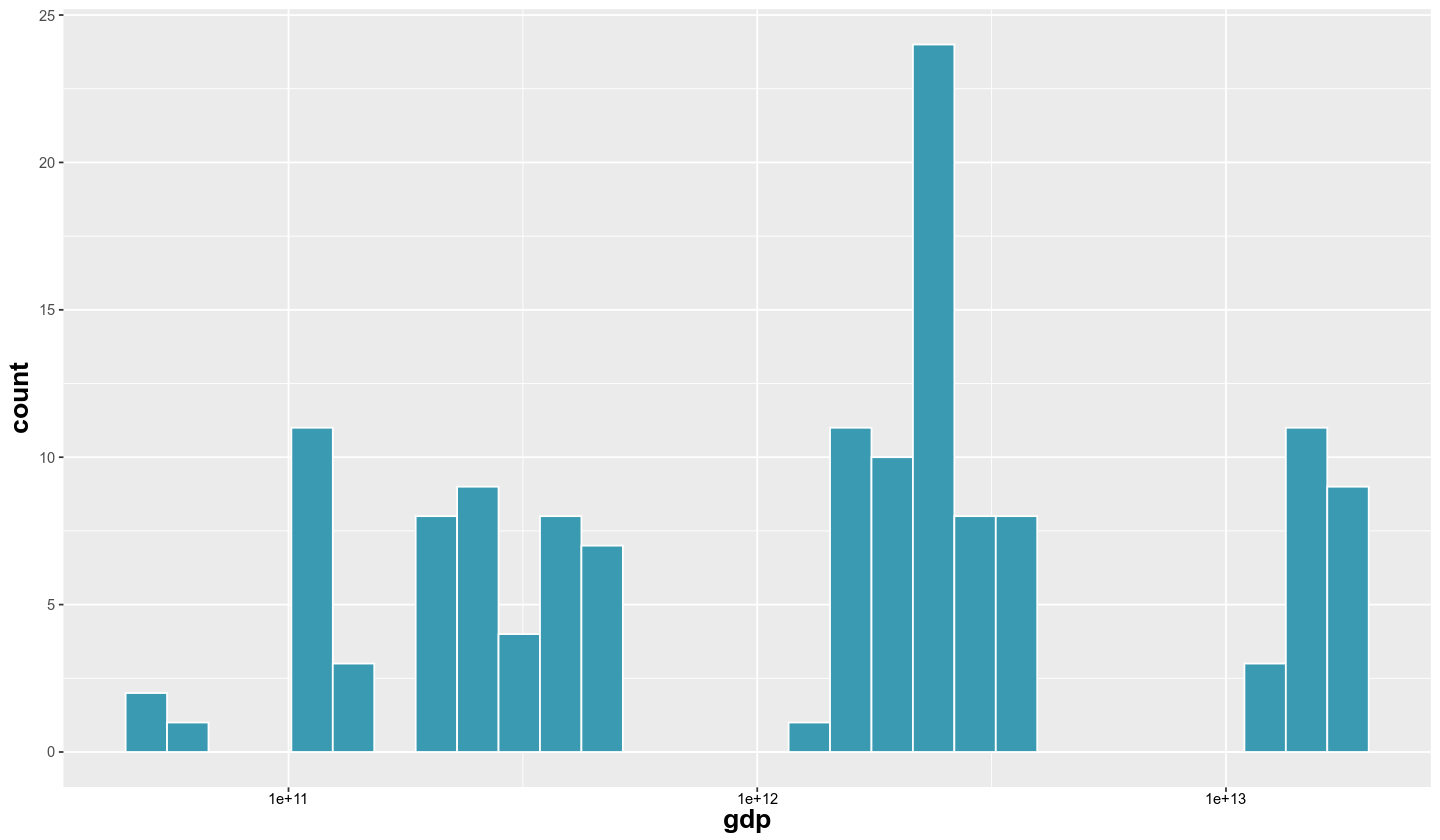

In [16]:
ggplot(data=df, aes(x = gdp) ) +
    geom_histogram(color = "white") +
    scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


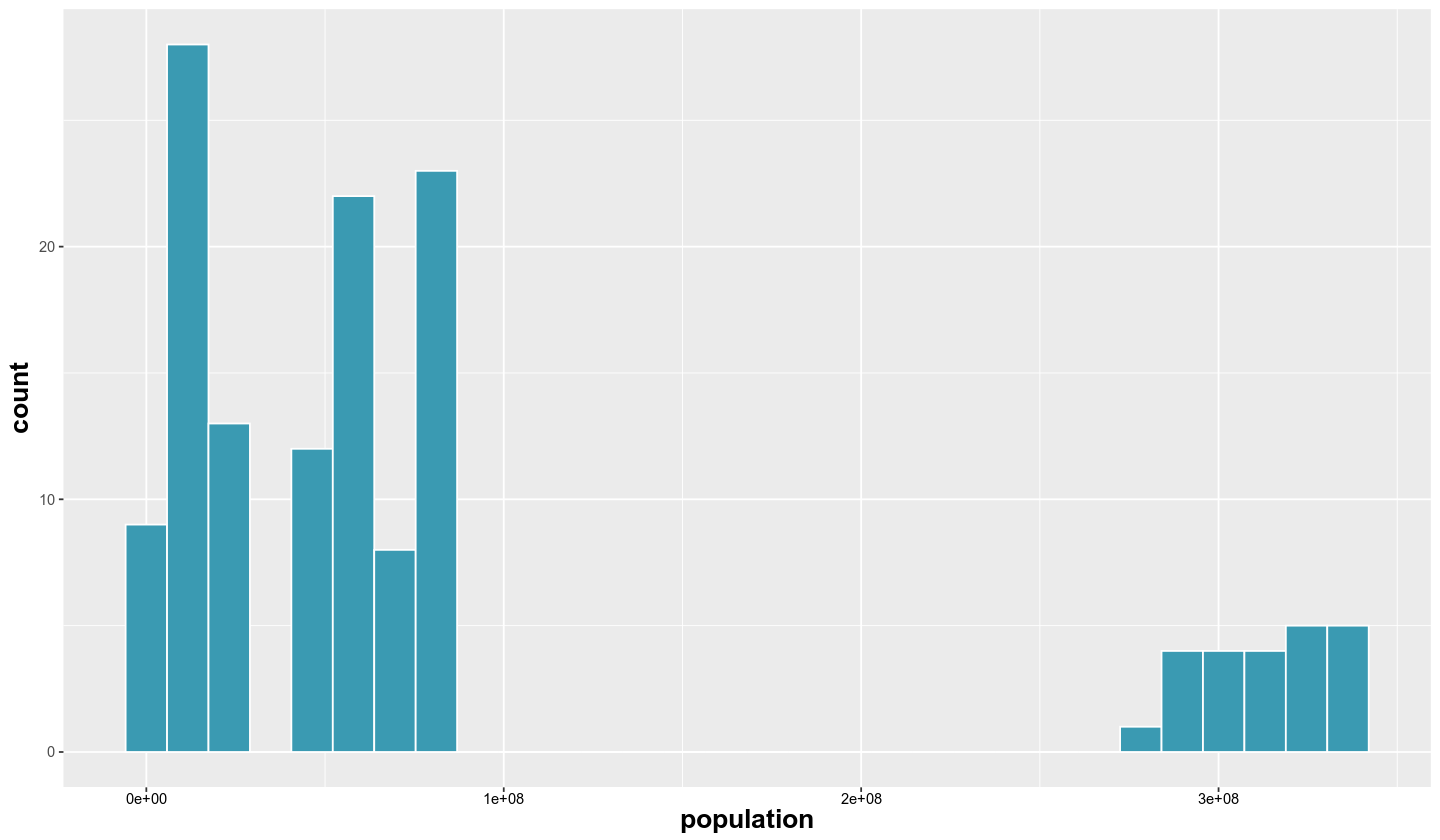

In [17]:

ggplot(df, aes(x = population)) +
 geom_histogram()

### Distirbution of changes in renewable energy and fossil fuels

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


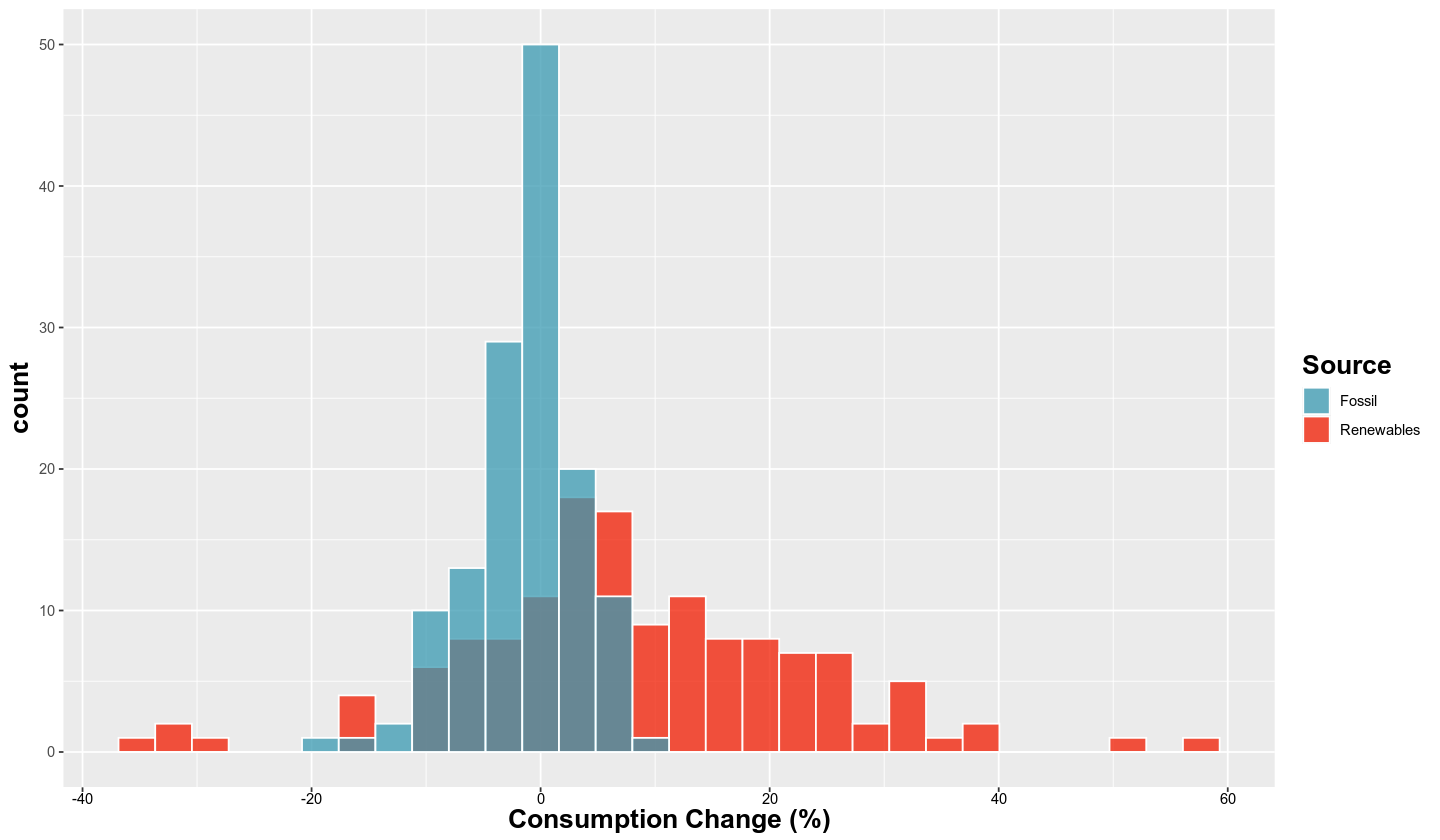

In [18]:
ggplot(df) +
  geom_histogram(aes(x = renewables_cons_change_pct, fill = "Renewables"), 
                 alpha = 0.75, position = "identity") +
  geom_histogram(aes(x = fossil_cons_change_pct, fill = "Fossil"), 
                 alpha = 0.75, position = "identity") +
  scale_fill_manual(values = dual_pal) +
  labs(x = "Consumption Change (%)", fill = "Source") 

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


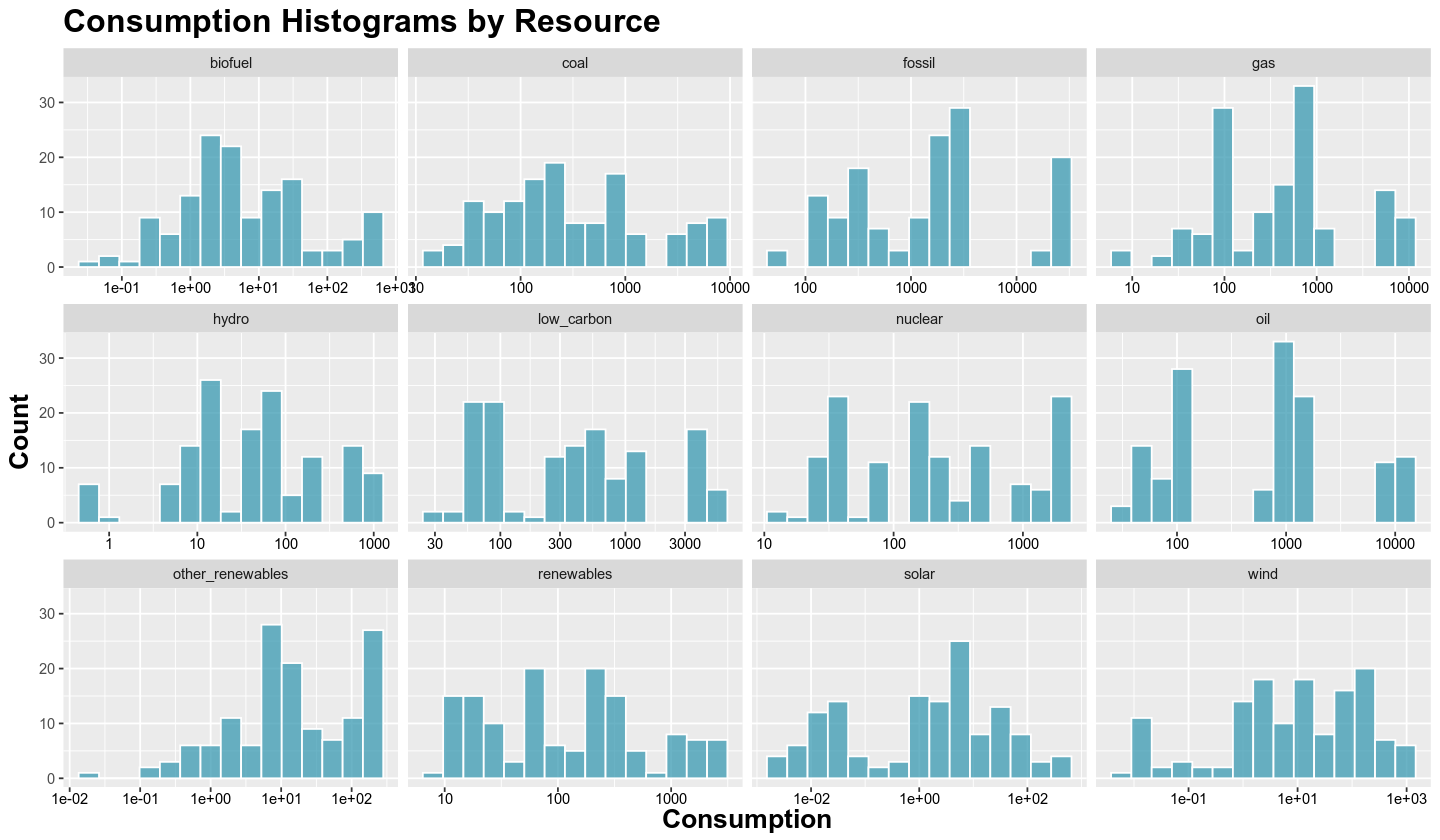

In [20]:
ggplot(df_long, aes(x = consumption)) +
  geom_histogram(fill = my_palette[1], color = "white", alpha = 0.75, bins=15) +
  facet_wrap(~ resource, scales = "free_x") + 
  scale_x_log10() +
  labs(x = "Consumption", y = "Count", title = "Consumption Histograms by Resource")
  

In [21]:
total_resources <- df_long %>%
  group_by(resource) %>% 
  summarize(total = sum(consumption)) 

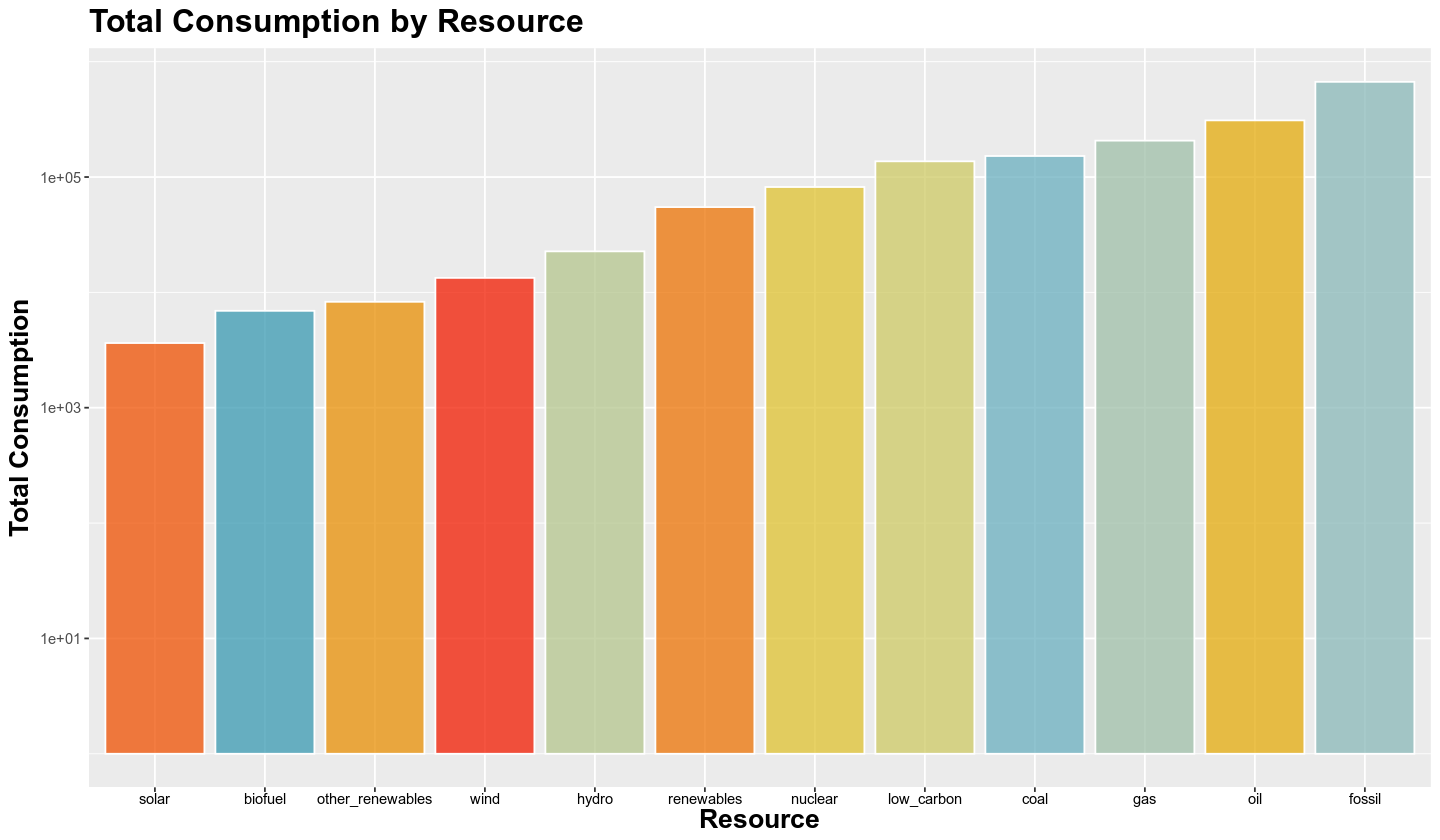

In [23]:
pal <- wes_palette("Zissou1", 12, type = "continuous")


ggplot(total_resources, aes(x = fct_reorder(resource, total), y = total, fill=resource)) +
  geom_col(alpha = 0.75, show.legend = FALSE) +
  scale_fill_manual(values = my_palette) +
  scale_y_log10() + 
  labs(x = "Resource", y = "Total Consumption", title = "Total Consumption by Resource")

## Bivariate

### Yearly Trends

Entropy

In [44]:
diversity <-  df_long %>%
    group_by(year, country) %>% 
    filter(!is.na(consumption) & consumption > 0) %>%
    mutate(prop = consumption / sum(consumption)) %>%
    summarise(
    entropy = entropy::entropy(prop, unit = "log10") 
    ) %>%
    ungroup()
        

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


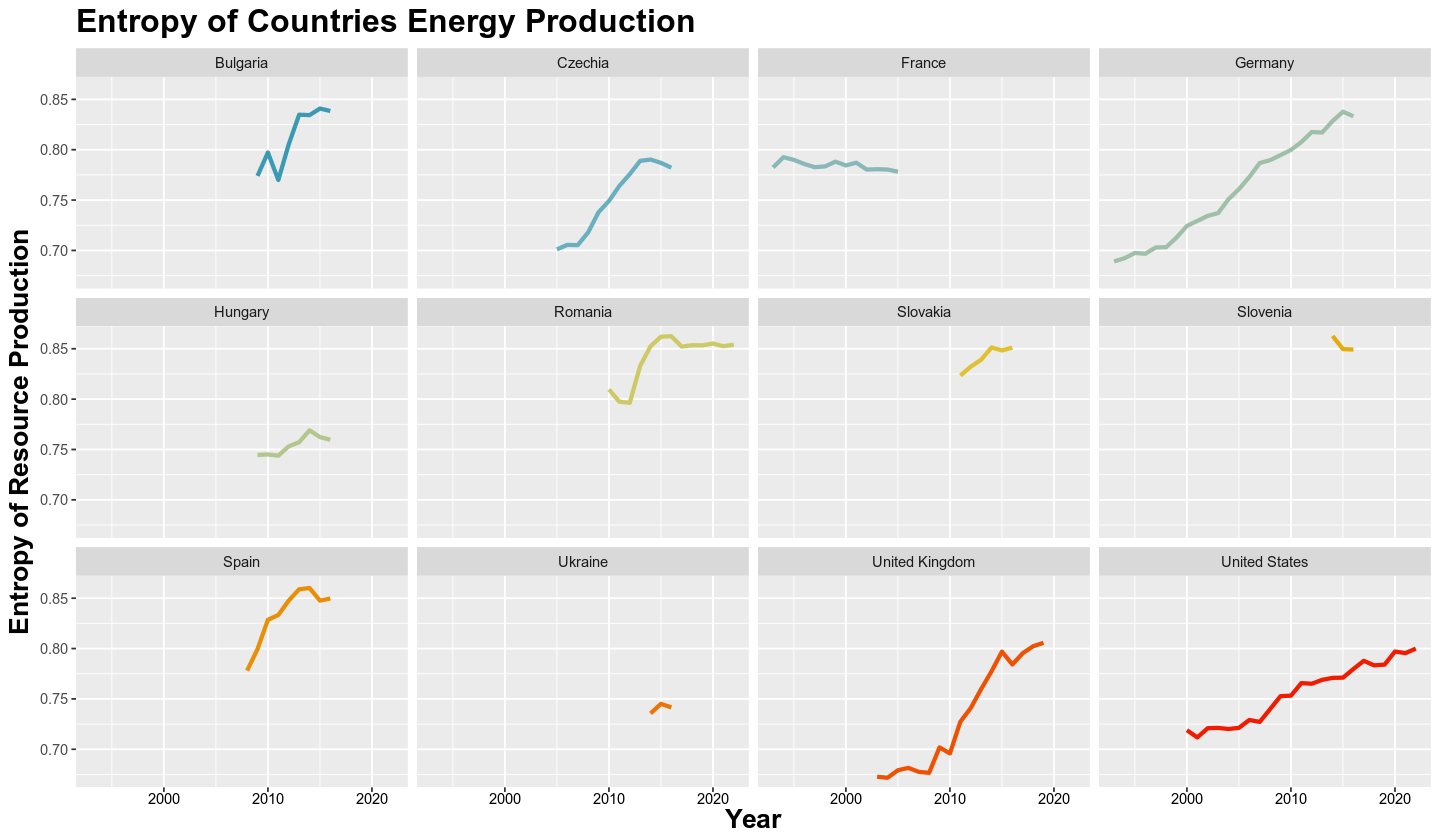

In [49]:
ggplot(diversity, aes(x = year, y= entropy, groups = country, color=country)) +
    geom_line(size=1.2, show.legend=FALSE) +
    facet_wrap(~country) + 
    scale_color_manual(values = my_palette) + 
    labs(title="Entropy of Countries Energy Production", x="Year", y="Entropy of Resource Production")

Percentage of Consumption from each resource over the years

In [46]:
yearly_resource_percentages <- df_long %>%
  group_by(year, resource) %>%
  summarise(total_consumption = sum(consumption), .groups = 'drop') %>%
  group_by(year) %>%
  mutate(
    percentage_consumption = total_consumption / sum(total_consumption) * 100
  )


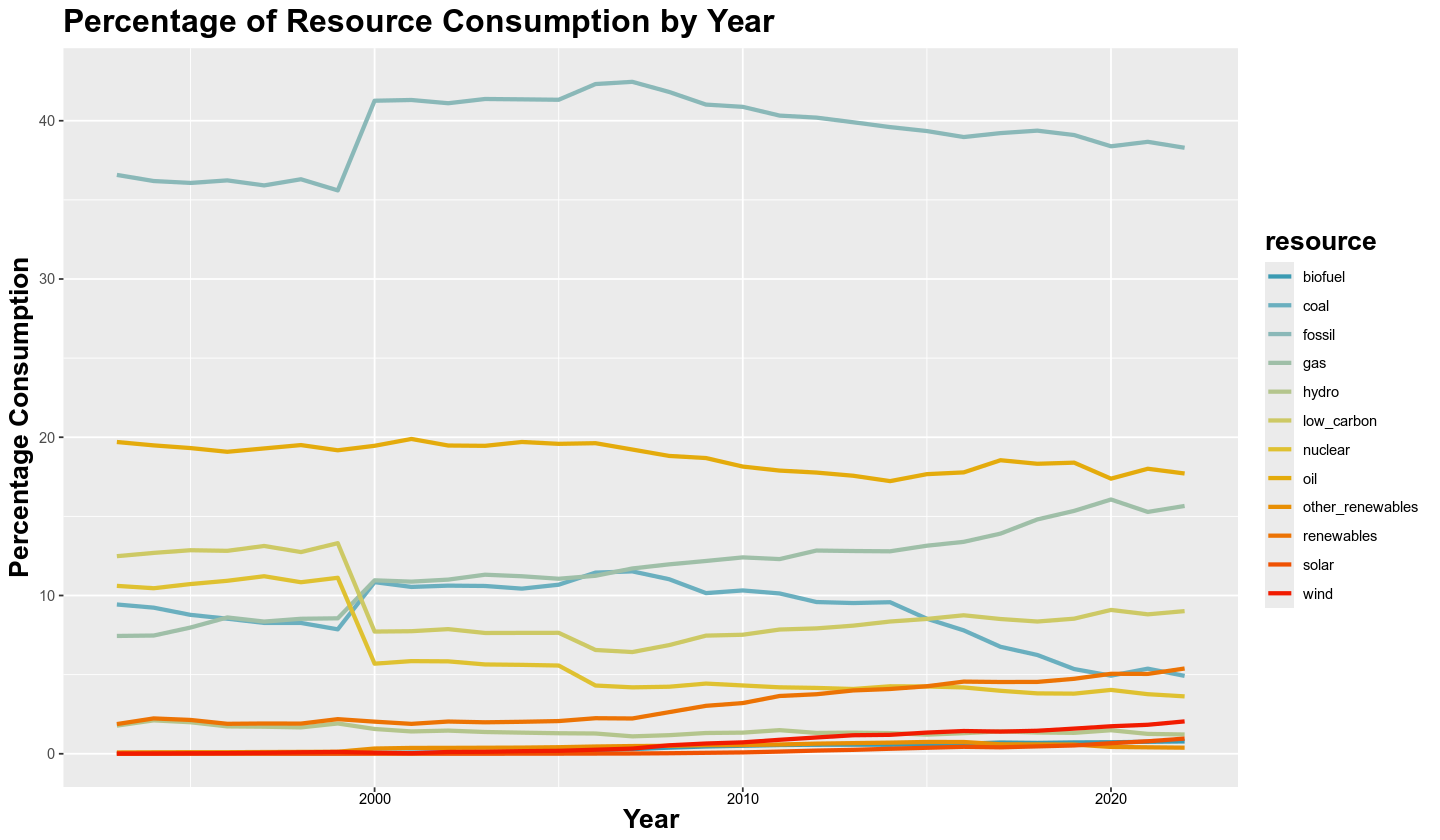

In [47]:
ggplot(yearly_resource_percentages, aes(x = year, y = percentage_consumption, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Resource Consumption by Year",
    x = "Year",
    y = "Percentage Consumption"
  )
    

Percentage of Electricity produced by Resource

In [ ]:
yearly_elec_prod <- df_long %>% 
  subset(country == 'United States') %>%
  group_by(year, resource) %>%
  summarise(mean_share = mean(share_elec), .groups = 'drop')


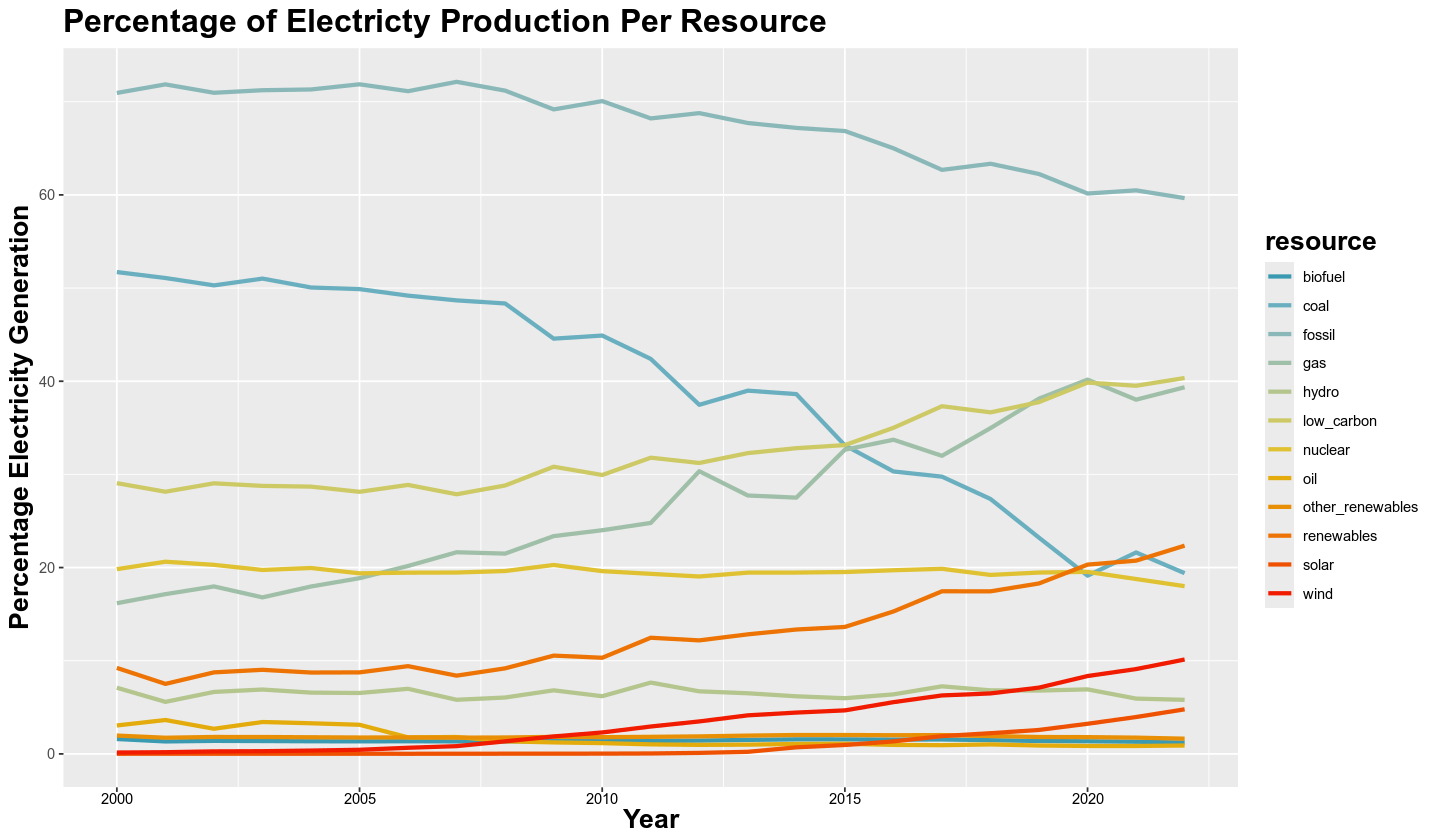

In [ ]:
pal <- wes_palette("Zissou1", 12, type = "continuous")

ggplot(yearly_elec_prod, aes(x = year, y = mean_share, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Electricty Production Per Resource",
    x = "Year",
    y = "Percentage Electricity Generation"
  )
    

fossil fuel ratios over time

In [52]:
df$fossil_ratio <- df$fossil_fuel_consumption / df$renewables_consumption

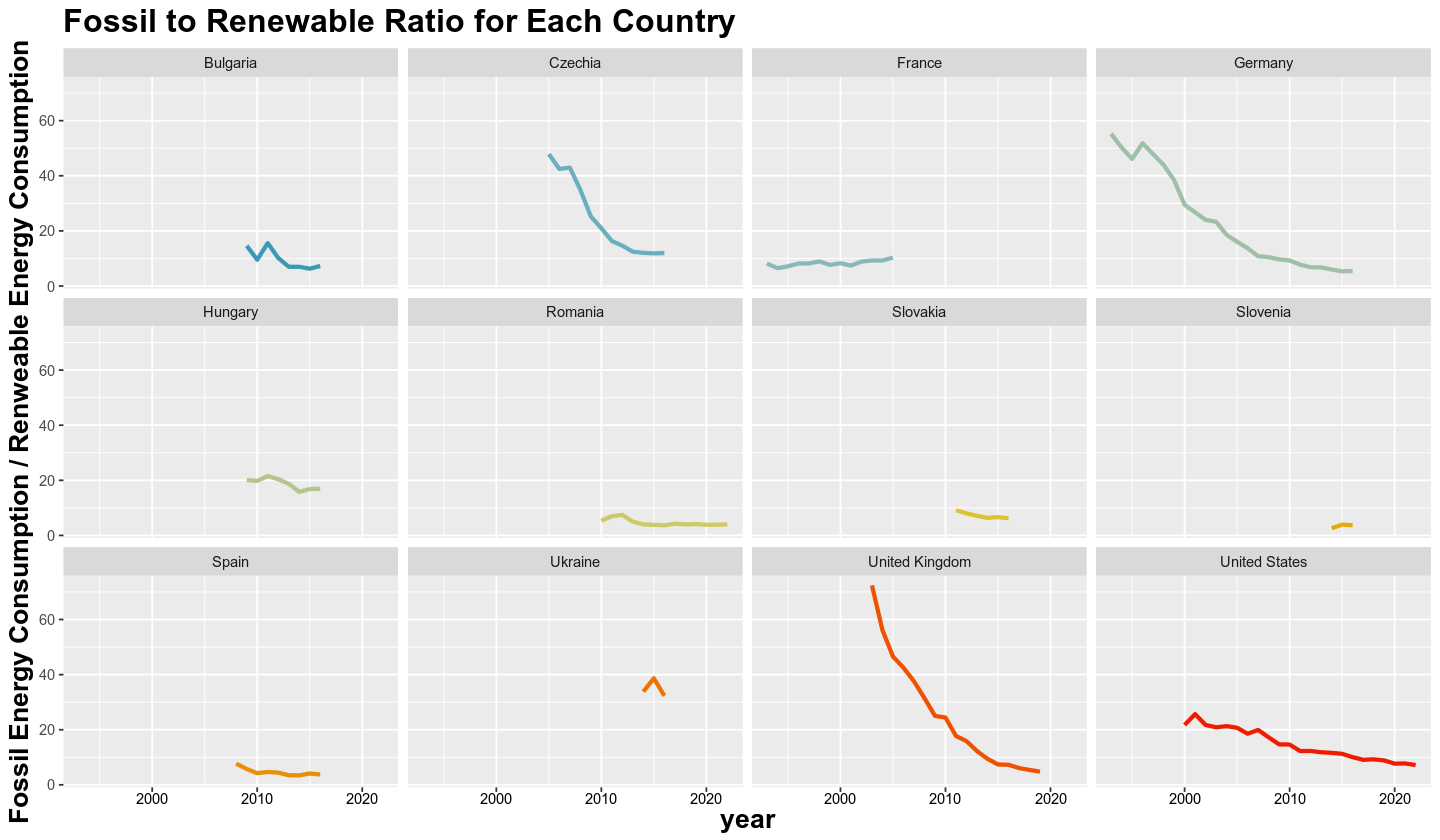

In [53]:
pal <- wes_palette("Zissou1", 12, type = "continuous")
ggplot(df, aes(x=year, y=fossil_ratio, color=country)) +
    geom_line(size=1.2, show.legend = FALSE) +
    scale_color_manual(values = pal) +
    facet_wrap(~country) +
    labs(title = "Fossil to Renewable Ratio for Each Country", y="Fossil Energy Consumption / Renweable Energy Consumption")

renewable energy percentages

In [ ]:
RENEWABLE <- c("wind", "solar", "hydro", "other_renewables")

In [ ]:
renewables <- df_long %>% 
  filter(resource %in% RENEWABLE) %>% 
  group_by(year, resource) %>% 
  summarise(resource_electricity = sum(electricity), .groups = "drop") %>%
  group_by(year) %>% 
  mutate(
    total_renewable = sum(resource_electricity),
    percentage_of_total_renewables = resource_electricity / total_renewable
  )

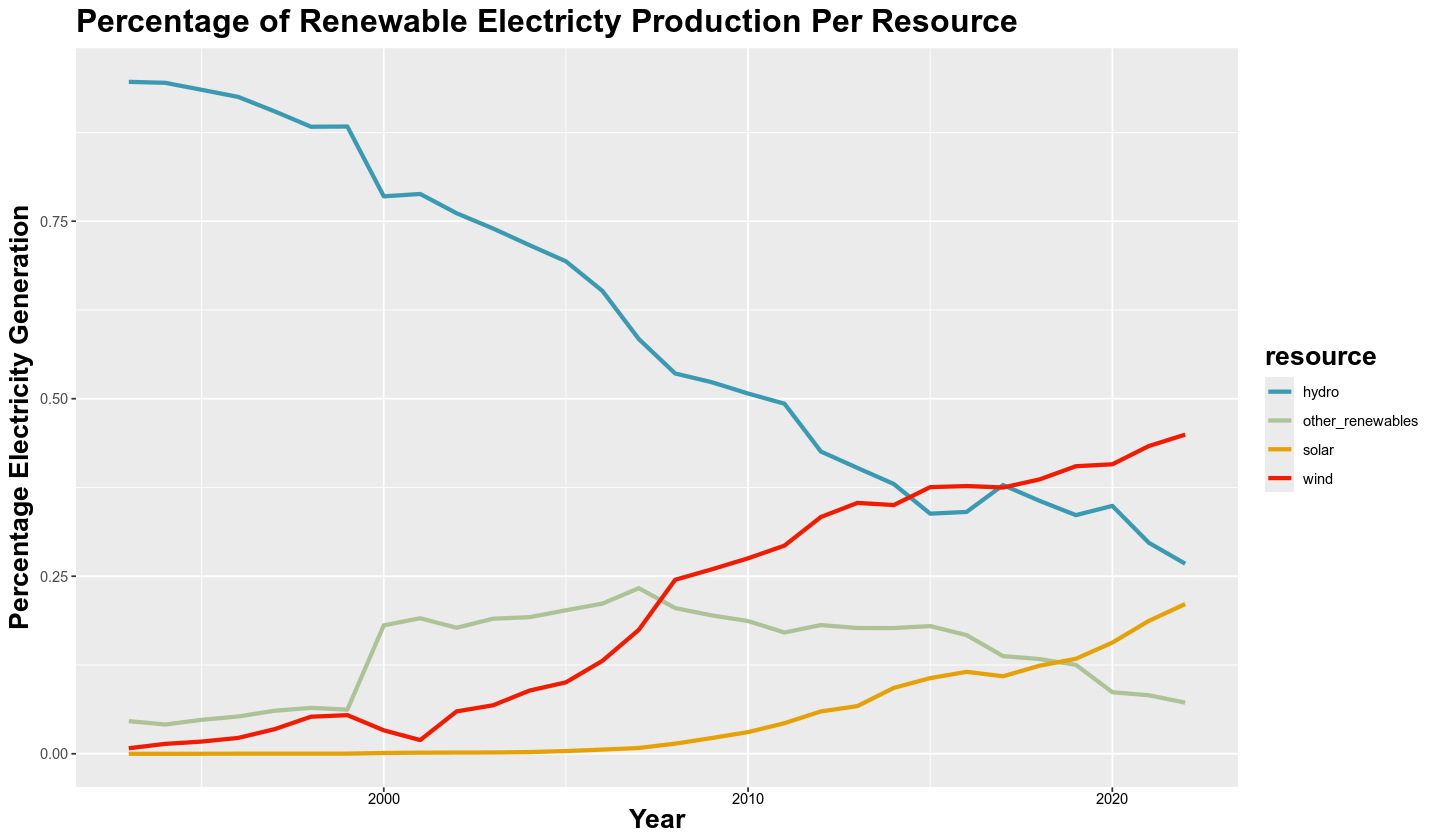

In [ ]:
pal <- wes_palette("Zissou1", 4, type = "continuous")

ggplot(renewables, aes(x = year, y = percentage_of_total_renewables, group = resource, color = resource)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = pal) +
  labs(
    title = "Percentage of Renewable Electricty Production Per Resource",
    x = "Year",
    y = "Percentage Electricity Generation"
  )

Change PCT

In [55]:
change_pct <- df_long %>%  
  group_by(year, resource) %>%
  summarise(mean_pct_change = mean(cons_change_pct), .groups = 'drop')

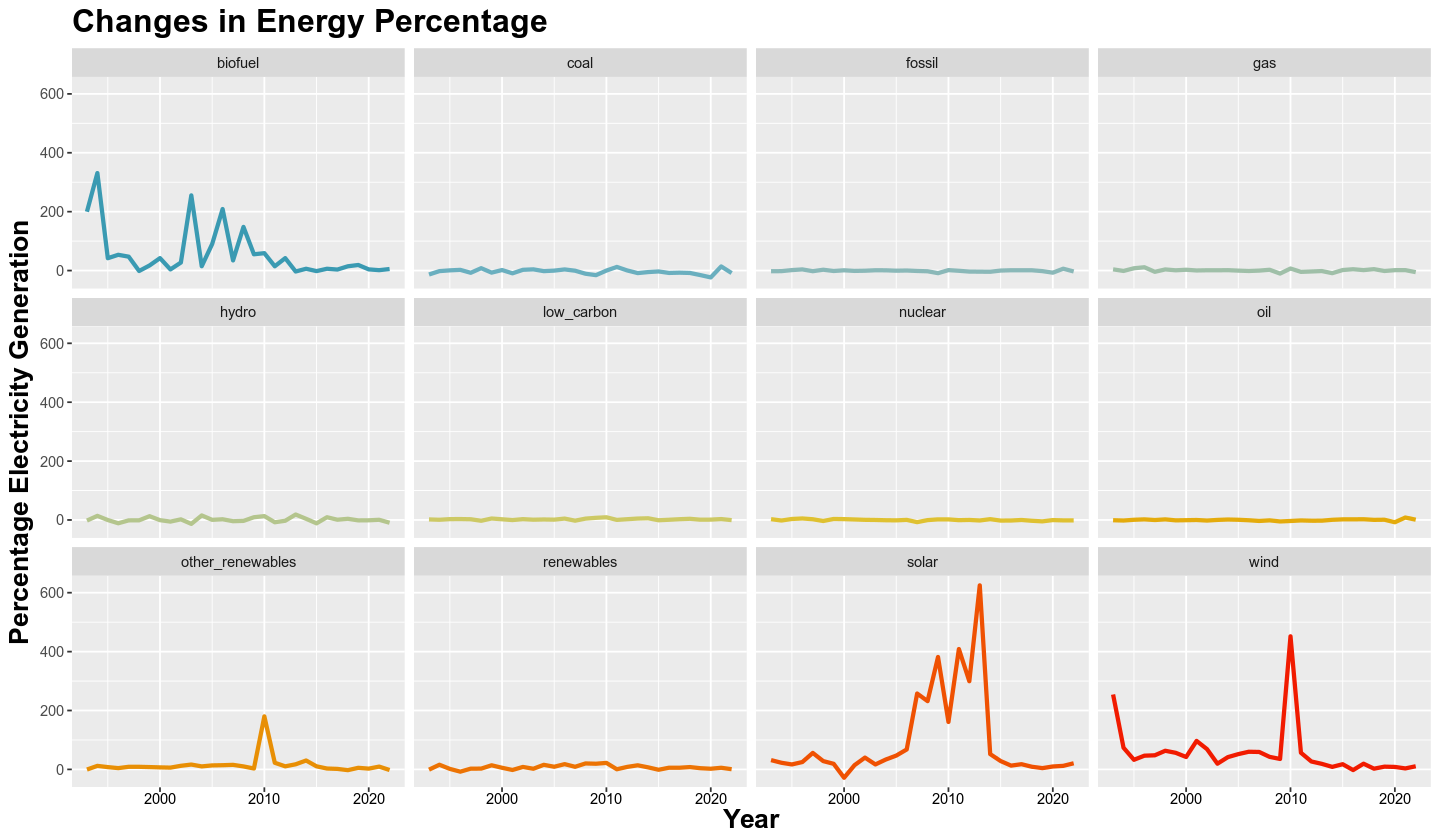

In [56]:

pal <- wes_palette("Zissou1", 12, type = "continuous")

ggplot(change_pct, aes(x=year, y=mean_pct_change, groups = resource, color= resource)) +
  geom_line(size = 1.2, show.legend = FALSE) +
  facet_wrap(~resource) + 
  scale_color_manual(values = pal) +
  labs(
    title = "Changes in Energy Percentage",
    x = "Year",
    y = "Percentage Electricity Generation"
  )
    

energy consumption

In [71]:
green_house <- df_long %>%
  group_by(year, country) %>%
  slice_head(n = 1) %>% 
  ungroup() %>%
  group_by(year) %>%
  summarise(
    total_emission = sum(greenhouse_gas_emissions, na.rm = TRUE),
    .groups = "drop"
  )

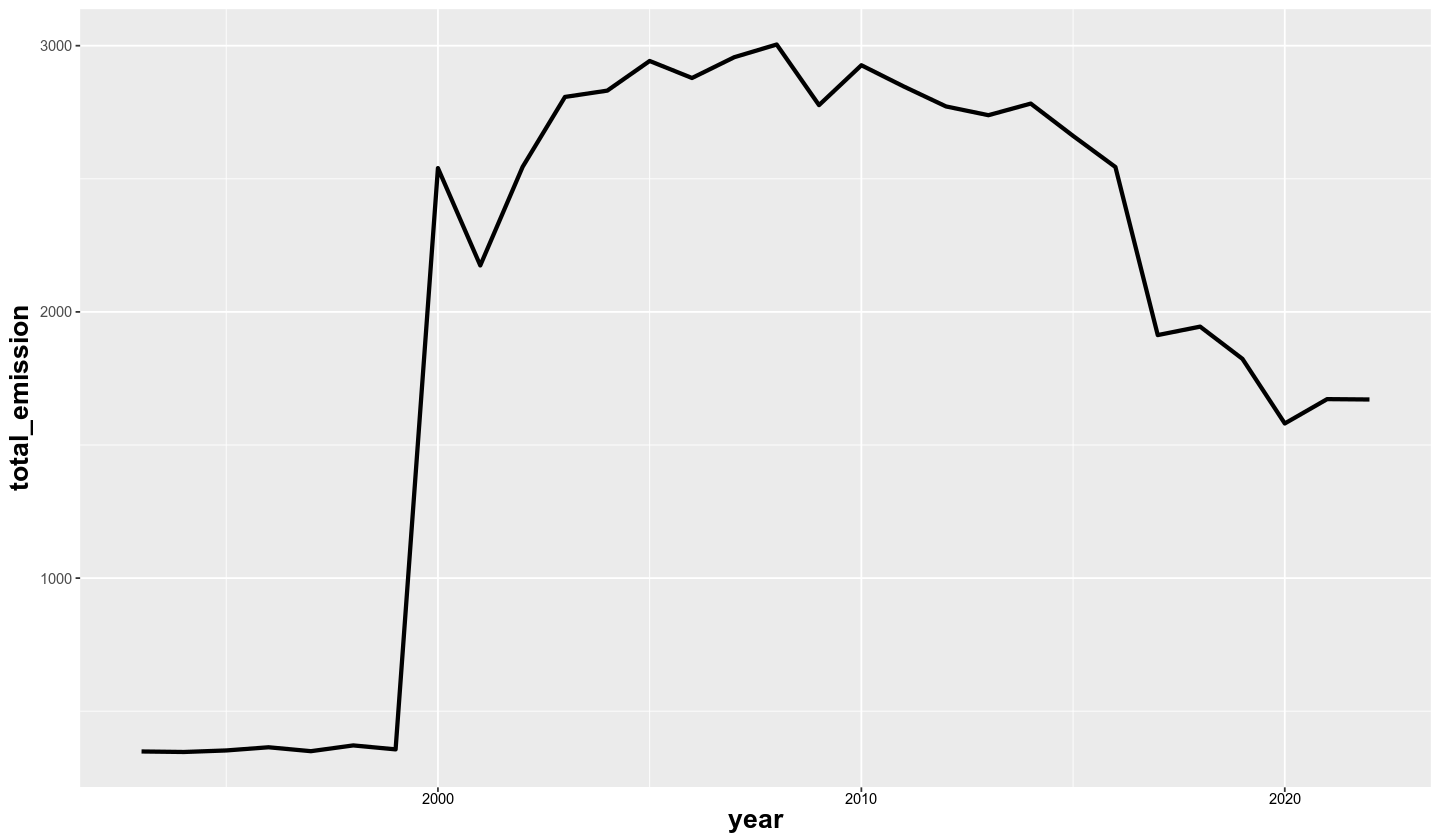

In [73]:
ggplot(green_house, aes(x= year, y=total_emission)) +
    geom_line(size=1.2)
    

### Relational Plots

## Hyper Variate